In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Bar,Grid,WordCloud,Pie
from pyecharts.globals import CurrentConfig, NotebookType, SymbolType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
data_kdgd = pd.read_csv("幼儿园.csv")
data_pmsc = pd.read_csv("中小学.csv")
data_trn = pd.read_csv("外语培训.csv")
data_clg = pd.read_csv("职业院校.csv")
# data_tic = pd.read_csv("teachinchina.csv")
data_jlc = pd.read_csv("jobleadchina.csv")
data_gm = pd.read_csv("data_gm.csv")

In [3]:
data_kdgd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        50 non-null     object
 1   link         50 non-null     object
 2   salary       50 non-null     object
 3   company      50 non-null     object
 4   area         50 non-null     object
 5   update_time  50 non-null     object
 6   exp_title    50 non-null     object
dtypes: object(7)
memory usage: 2.9+ KB


In [4]:
data_kdgd.sample(5)

,title,link,salary,company,area,update_time,exp_title
47,幼儿园英语教师,/jobs_view_594404.html,3-3.6W/年,揭西县兴贤实验学校,揭阳-揭西县,02-07,大专/1年以上
9,幼儿/托育教师(青年教师),/jobs_view_746134.html,5-7K/月,广州市华美英语实验学校,广州-天河区,04-22,本科/1年以上
37,幼儿英语教师(青年教师),/jobs_view_719866.html,3-6K/月,郑州经开区瑞丁幼儿园,河南-郑州,04-14,大专/2年以上
13,幼儿英语教师,/jobs_view_744376.html,6-8K/月,杭州市萧山区高瞻幼儿园,杭州-萧山区,04-21,大专/1年以上
40,幼儿英语教师(青年教师),/jobs_view_421977.html,10-18W/年,苏州市吴江区苏州湾外国语学校,苏州-吴江区,04-14,本科/2年以上


In [5]:
# 把来自万行教师的四个数据集组合成一个Dataframe
data_kdgd['type'] = '幼儿园'
data_pmsc['type'] = '中小学'
data_trn['type'] = '外语培训'
data_clg['type'] = '职业院校'
data_wx = pd.concat([data_kdgd, data_pmsc, data_trn, data_clg])

In [6]:
data_wx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 216
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        4177 non-null   object
 1   link         4177 non-null   object
 2   salary       4177 non-null   object
 3   company      4177 non-null   object
 4   area         4177 non-null   object
 5   update_time  4177 non-null   object
 6   exp_title    4177 non-null   object
 7   type         4177 non-null   object
dtypes: object(8)
memory usage: 293.7+ KB


In [7]:
data_wx.sample(5)

,title,link,salary,company,area,update_time,exp_title,type
396,优秀小学英语教师,/jobs_view_374680.html,15-18W/年,华业外国语学校,梅州-梅县区,04-22,本科/3年以上,外语培训
328,小学英语教师（低段）(青年教师),/jobs_view_730797.html,5-8K/月,北京市朝阳区金地老君堂实验学校,北京-朝阳区,04-21,本科/3年以上,中小学
459,英语骨干教师,/jobs_view_582979.html,20-30W/年,宁波协和小学,宁波-鄞州区,04-21,本科/5年以上,中小学
1113,初中英语教师(青年教师),/jobs_view_728271.html,6-10K/月,中山市坦洲华特雅学校,广东-中山,04-22,本科/1年以上,中小学
449,小学英语教师,/jobs_view_74760.html,12-15K/月,东莞市石竹实验学校,广东-东莞,04-21,本科/1年以上,中小学


### 万行教师数据清洗
- 清洗出省份、城市
- 经验、学历
- 工资

#### 1. 清洗出省份、城市

In [8]:
data_wx['area'].sample(10)

89      广州-白云区
1465    佛山-禅城区
1576    佛山-顺德区
889     潮州-潮安区
1221    吉安-泰和县
538      广东-东莞
1280    成都-郫都区
120     苏州-昆山市
1529    衡阳-南岳区
383     广州-越秀区
Name: area, dtype: object

In [9]:
data_wx['area'].str.split("-", expand=True)

,0,1
0,广东,东莞
1,佛山,高明区
2,镇江,句容市
3,晋中,太谷区
4,十堰,茅箭区
...,...,...
212,山东,德州
213,恩施,利川市
214,青岛,黄岛区
215,苏州,工业园区


In [10]:
data_wx['province'] = data_wx['area'].str.split("-", expand=True)[0]
print(data_wx['province'].sample(10))
data_wx['city'] = data_wx['area'].str.split("-", expand=True)[1]
# 把北京、天津、上海、重庆的城市改为原来的名字
data_wx.loc[data_wx['province'] == '北京', 'city'] = '北京'
data_wx.loc[data_wx['province'] == '上海', 'city'] = '上海'
data_wx.loc[data_wx['province'] == '天津', 'city'] = '天津'
data_wx.loc[data_wx['province'] == '重庆', 'city'] = '重庆'

1068    广州
67      厦门
1540    汉中
1244    广州
970     成都
1706    汕头
2574    衡阳
212     保山
870     广东
38      大理
Name: province, dtype: object


#### 2. 清洗出经验、学历

In [11]:
data_wx['exp_title'].sample(5)

644     本科/3年以上
2500    硕士/3年以上
1871    本科/3年以上
902     本科/3年以上
452     本科/3年以上
Name: exp_title, dtype: object

In [12]:
data_wx['exp'] = data_wx['exp_title'].str.split("/", expand=True)[1]
data_wx['degree'] = data_wx['exp_title'].str.split("/", expand=True)[0]

In [13]:
data_wx['exp'].unique()

array(['1年以上', '应届生', '3年以上', '经验不限', '2年以上', '5年以上', '6年以上', '10年以上',
       '8年以上', '4年以上', '7年以上', '9年以上'], dtype=object)

In [14]:
exp_map = {'经验不限':'经验不限', '1年以上':'一到三年', '3年以上':'三到五年', '2年以上':'一到三年',
           '5年以上':'五到十年', '应届生':'经验不限', '6年以上':'五到十年', '4年以上':'三到五年',
           '9年以上':'五到十年', '7年以上':'五到十年', '10年以上':'十年以上', '8年以上':'五到十年'}
data_wx['exp'] = data_wx['exp'].map(exp_map)

In [15]:
data_wx['degree'].unique()

array(['大专', '本科', '硕士', '博士'], dtype=object)

In [16]:
degree_map = {'大专':'大专', '本科':'本科',  '硕士':'硕士', '博士':'博士'}
data_wx['degree'] = data_wx['degree'].map(degree_map)

In [17]:
data_wx.sample(5)

,title,link,salary,company,area,update_time,exp_title,type,province,city,exp,degree
953,高中英语教师,/jobs_view_749683.html,8-16K/月,福州成思教育投资有限公司,福州-闽侯县,04-22,本科/经验不限,外语培训,福州,闽侯县,经验不限,本科
1808,初中英语教师(资深),/jobs_view_309640.html,7-14K/月,合肥新华实验中学,合肥-庐阳区,04-21,本科/5年以上,中小学,合肥,庐阳区,五到十年,本科
713,办公室文员（储备英语教师方向）,/jobs_view_731096.html,2.4-3K/月,广东省普宁市流沙第一实验小学,揭阳-普宁市,04-20,大专/1年以上,中小学,揭阳,普宁市,一到三年,大专
1796,初中英语教师,/jobs_view_623009.html,7.5-15K/月,南京苏杰学校,南京-浦口区,04-21,本科/3年以上,中小学,南京,浦口区,三到五年,本科
380,初三英语老师,/jobs_view_323149.html,7-13K/月,广州市卓越里程教育科技有限公司,广东-广州,04-22,本科/经验不限,外语培训,广东,广州,经验不限,本科


#### 3. 清洗出工资

In [18]:
data_wx['salary'].unique()

array(['4-6K/月', '4.1-5.5K/月', '8-14W/年', '2-4W/年', '3.5-6K/月', '6-8K/月',
       '4-8K/月', '0.8K/月', '5-7K/月', '6-10W/年', '7-10K/月', '3.5-5K/月',
       '5-10K/月', '4-5.5K/月', '5-8K/月', '5-9K/月', '5-6K/月', '3-3.5K/月',
       '4-5K/月', '8-16W/年', '8-12K/月', '7-13K/月', '8-15W/年', '10-15K/月',
       '10-20W/年', '3.5-5.5K/月', '7-12W/年', '8-13K/月', '3-6K/月',
       '4.5-6K/月', '10-18W/年', '15-20K/月', '4-8W/年', '6-9W/年', '4.5-5K/月',
       '3-3.6W/年', '6.4-8.4K/月', '7.5-12K/月', '12-20W/年', '11-15W/年',
       '11-20W/年', '20-28W/年', '7-14W/年', '18-28W/年', '13-16W/年',
       '5-10W/年', '8-10K/月', '6-15K/月', '6-12K/月', '13-25W/年', '20-40W/年',
       '15-20W/年', '13-18W/年', '6-10K/月', '15-18K/月', '13-26W/年',
       '11-22W/年', '18-35W/年', '15-30W/年', '7-10W/年', '8-12W/年', '4-7K/月',
       '1.6K/月', '8-10W/年', '25-35W/年', '10-15W/年', '6-12W/年', '12-18W/年',
       '5.5-8K/月', '25-40W/年', '12-16K/月', '12-15W/年', '4K/月', '16-25W/年',
       '20-35W/年', '35-50W/年', '12-16W/年', '16-30W/年', '30-50W/年',
 

In [19]:
def get_salary(data):
    pat_K = r"(.*)-(.*)K"
    pat_W = r"(.*)-(.*)W"
    pat_Y = r"(.*)-(.*)元"
    pat_w = r"(.*)W"
    pat_k = r"(.*)K"

    if 'K' in data and '月' in data and '-' in data:
        low = re.findall(pattern=pat_K, string=data)[0][0]
        high = re.findall(pattern=pat_K, string=data)[0][1]
        return (float(low)+float(high))/2.2
    if 'W' in data and '年' in data and '-' in data:
        low = re.findall(pattern=pat_W, string=data)[0][0]
        high = re.findall(pattern=pat_W, string=data)[0][1]
        return (float(low)+float(high))*10/2.2/12
    if '元' in data and '课时' in data and '-' in data:
        low = re.findall(pattern=pat_Y, string=data)[0][0]
        high = re.findall(pattern=pat_Y, string=data)[0][1]
        return (float(low)+float(high))*40/1000/2.2
    if 'W' not in data and '月' in data and 'K' in data:
        low = re.findall(pattern=pat_k, string=data)[0][0]
        high = re.findall(pattern=pat_k, string=data)[0][0]
        return (float(low)+float(high))/2
    if 'K' not in data and '年' in data and 'W' in data:
        low = re.findall(pattern=pat_w, string=data)[0][0]
        high = re.findall(pattern=pat_w, string=data)[0][0]
        return (float(low)+float(high))*10/2

data_wx['salary_clean'] = data_wx['salary'].apply(get_salary)

In [20]:
data_wx['salary_clean'] = np.round(data_wx['salary_clean'], 1)

In [21]:
data_wx.sample(5)

,title,link,salary,company,area,update_time,exp_title,type,province,city,exp,degree,salary_clean
989,初中英语教师(成熟教师),/jobs_view_674781.html,15-25W/年,四川省宜宾市翠屏区棠湖学校,宜宾-翠屏区,04-22,本科/3年以上,中小学,宜宾,翠屏区,三到五年,本科,15.2
169,小学英语教师,/jobs_view_758006.html,10-15W/年,上海市同洲模范学校,上海-宝山区,04-22,本科/1年以上,中小学,上海,上海,一到三年,本科,9.5
884,小学英语教师,/jobs_view_764958.html,7-10K/月,北京景山学校大爱城分校,廊坊-香河县,04-17,本科/经验不限,中小学,廊坊,香河县,经验不限,本科,7.7
1321,初中英语 骨干教师,/jobs_view_497125.html,20-40W/年,乐清市荆山公学,温州-乐清市,04-22,本科/3年以上,中小学,温州,乐清市,三到五年,本科,22.7
2522,高中英语教师,/jobs_view_753568.html,10-20W/年,湘一阳明学校,永州-双牌县,04-22,本科/经验不限,中小学,永州,双牌县,经验不限,本科,11.4


### JobLeadChina数据清洗
- 清洗出“exp_title”
- 清洗出“salary”

In [22]:
data_jlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         954 non-null    object
 1   com_type     954 non-null    object
 2   company      954 non-null    object
 3   education    954 non-null    object
 4   exp_title    954 non-null    object
 5   link         954 non-null    object
 6   salary       954 non-null    object
 7   title        954 non-null    object
 8   update_time  954 non-null    object
dtypes: object(9)
memory usage: 67.2+ KB


In [23]:
data_jlc.sample(5)

,area,com_type,company,education,exp_title,link,salary,title,update_time
266,Beijing,School,LCAIS,Bachelor,Experience: Entry Level,http://www.jobleadchina.com/job/2370,16K/MTH - 25K/MTH,Beijing ChangPing District International Kinde...,"Post time: July 27, 2021"
598,Beijing,Teaching Center,威尔式教育,Any education,Experience: Entry Level,http://www.jobleadchina.com/job/1160,2K/MTH - 10K/MTH,ESL Teacher,"Post time: September 21, 2020"
723,Beijing,Teaching Center,BabyCandy,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/675,3000K/MTH - 18000K/MTH,Foreign English teachers are Needed!,"Post time: May 15, 2020"
623,Others,Teaching Center,Octopus English Center,Bachelor,Experience: Mid-Senior Level,http://www.jobleadchina.com/job/1110,15K/MTH - 20K/MTH,20K per month for foreigner english teachers,"Post time: August 29, 2020"
420,Hangzhou,Consultancy/Legal/Admin,D&K Management Consulting,Bachelor,Experience: Entry Level,http://www.jobleadchina.com/job/1815,30K/MTH - 31K/MTH,Physics/ accounting/ maths/ English/ Chemistry...,"Post time: April 12, 2021"


#### 1. 清洗出exp_title

In [24]:
data_jlc['exp_title'].unique()

array(['Experience: Mid-Senior Level', 'Experience: Entry Level',
       'Experience: Associate', 'Experience: Director',
       'Experience: Executive', 'Experience: Internship'], dtype=object)

In [25]:
data_jlc['exp_title_clean'] = data_jlc['exp_title'].str.split(": ", expand=True)[1]

#### 2. 清洗出salary

In [26]:
data_jlc['salary'].unique()

array(['15000K/MTH - 20000K/MTH', '13K/MTH - 26K/MTH',
       '13K/MTH - 18K/MTH', '10000K/MTH - 20000K/MTH',
       '15K/MTH - 22K/MTH', '8000K/MTH - 20000K/MTH', '20K/MTH - 25K/MTH',
       '16K/MTH - 23K/MTH', '8K/MTH - 14K/MTH', '15K/MTH - 18K/MTH',
       '20000K/MTH - 30000K/MTH', '13K/MTH - 20K/MTH',
       '11K/MTH - 16K/MTH', '20K/MTH - 28K/MTH', '6000K/MTH - 20000K/MTH',
       '8K/MTH - 18K/MTH', '20K/MTH - 30K/MTH', '8000K/MTH - 18000K/MTH',
       '12K/MTH - 16K/MTH', '13000K/MTH - 16000K/MTH',
       '14K/MTH - 18K/MTH', '15K/MTH - 30K/MTH', '12K/MTH - 25K/MTH',
       '8K/MTH - 20K/MTH', '13K/MTH - 25K/MTH', '13K/MTH - 16K/MTH',
       '10K/MTH - 30K/MTH', '8K/MTH - 12K/MTH', '20K/MTH - 26K/MTH',
       '26K/MTH - 28K/MTH', '13000K/MTH - 25000K/MTH',
       '13000K/MTH - 15000K/MTH', '15K/MTH - 25K/MTH',
       '12000K/MTH - 20000K/MTH', '18K/MTH - 25K/MTH',
       '16000K/MTH - 19000K/MTH', '12K/MTH - 17K/MTH',
       '15K/MTH - 17K/MTH', '7K/MTH - 18K/MTH', '20K/MTH - 

In [27]:
def get_salary_jlc(data):
    pat_jlc = r"(.*)K/MTH - (.*)K/MTH"
#     if '00' in data:
#         print(re.findall(pattern=pat_jlc, string=data)[0])
#         low, high = re.findall(pattern=pat_jlc, string=data)[0]
#         return (float(low)+float(high))/2/1000
#     else:

    low, high = re.findall(pattern=pat_jlc, string=data)[0]
    lowf = float(low)
    highf = float(high)
    if lowf > 1000 and highf > 1000:
        lowf = lowf/1000
        highf = highf/1000
    print(lowf,highf)       
    return (lowf+highf)/2

data_jlc['salary_clean'] = data_jlc['salary'].apply(get_salary_jlc)

15.0 20.0
13.0 26.0
13.0 18.0
10.0 20.0
15.0 22.0
15.0 22.0
8.0 20.0
8.0 20.0
20.0 25.0
16.0 23.0
8.0 20.0
20.0 25.0
8.0 14.0
15.0 18.0
8.0 20.0
20.0 30.0
8.0 14.0
15.0 18.0
13.0 20.0
8.0 14.0
15.0 18.0
11.0 16.0
20.0 28.0
8.0 14.0
15.0 18.0
8.0 14.0
15.0 18.0
6.0 20.0
8.0 18.0
20.0 30.0
8.0 20.0
8.0 18.0
8.0 18.0
13.0 20.0
8.0 14.0
15.0 18.0
12.0 16.0
13.0 16.0
13.0 26.0
6.0 20.0
8.0 14.0
14.0 18.0
13.0 26.0
6.0 20.0
8.0 14.0
15.0 18.0
8.0 18.0
8.0 18.0
15.0 30.0
6.0 20.0
6.0 20.0
8.0 14.0
15.0 18.0
6.0 20.0
8.0 14.0
15.0 18.0
6.0 20.0
8.0 14.0
15.0 18.0
6.0 20.0
15.0 18.0
6.0 20.0
12.0 25.0
8.0 20.0
15.0 18.0
8.0 20.0
8.0 20.0
8.0 18.0
8.0 20.0
13.0 25.0
15.0 18.0
8.0 20.0
13.0 16.0
8.0 20.0
10.0 30.0
13.0 25.0
15.0 18.0
8.0 20.0
13.0 25.0
8.0 12.0
15.0 30.0
15.0 18.0
15.0 18.0
8.0 20.0
8.0 20.0
13.0 25.0
20.0 26.0
15.0 20.0
15.0 30.0
15.0 30.0
15.0 18.0
8.0 18.0
26.0 28.0
13.0 25.0
13.0 25.0
15.0 18.0
15.0 30.0
15.0 18.0
8.0 18.0
13.0 15.0
15.0 30.0
15.0 25.0
15.0 18.0
8.0 18.0
12.0

In [28]:
data_jlc.sample(5)

,area,com_type,company,education,exp_title,link,salary,title,update_time,exp_title_clean,salary_clean
668,Shanghai,Teaching Center,美国私塾,Any education,Experience: Associate,http://www.jobleadchina.com/job/892,12000K/MTH - 20000K/MTH,ENGLISH TUTOR-TEACHER,"Post time: July 14, 2020",Associate,16.0
469,Tianjin,School,T-school,Bachelor,Experience: Entry Level,http://www.jobleadchina.com/job/1586,10K/MTH - 10K/MTH,Teaching assistant for K-6,"Post time: January 11, 2021",Entry Level,10.0
643,Guangzhou,Teaching Center,WIEChina Education,Any education,Experience: Entry Level,http://www.jobleadchina.com/job/979,12K/MTH - 16K/MTH,English Teacher,"Post time: August 11, 2020",Entry Level,14.0
344,Shenzhen,Teaching Center,New Pathway,Bachelor,Experience: Mid-Senior Level,http://www.jobleadchina.com/job/2089,20000K/MTH - 25000K/MTH,Head Teacher (Junior Speech & Drama Teaching),"Post time: June 11, 2021",Mid-Senior Level,22.5
639,Beijing,Teaching Center,BOTO,Bachelor,Experience: Entry Level,http://www.jobleadchina.com/job/1032,16K/MTH - 24K/MTH,Full Time English Teacher,"Post time: August 15, 2020",Entry Level,20.0


### 问题：
1. 洋外教的工资真的高吗？
2. 市场对于洋外教的经验和学历要求如何？
3. 哪些地区对洋外教的需求多？
4. 什么机构在招聘洋外教？
5. 洋外教来源真的很乱吗？

# 1. 洋外教的工资真的高吗？

In [29]:
data_jlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             954 non-null    object 
 1   com_type         954 non-null    object 
 2   company          954 non-null    object 
 3   education        954 non-null    object 
 4   exp_title        954 non-null    object 
 5   link             954 non-null    object 
 6   salary           954 non-null    object 
 7   title            954 non-null    object 
 8   update_time      954 non-null    object 
 9   exp_title_clean  954 non-null    object 
 10  salary_clean     954 non-null    float64
dtypes: float64(1), object(10)
memory usage: 82.1+ KB


In [30]:
data_wx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 216
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         4177 non-null   object 
 1   link          4177 non-null   object 
 2   salary        4177 non-null   object 
 3   company       4177 non-null   object 
 4   area          4177 non-null   object 
 5   update_time   4177 non-null   object 
 6   exp_title     4177 non-null   object 
 7   type          4177 non-null   object 
 8   province      4177 non-null   object 
 9   city          4177 non-null   object 
 10  exp           4177 non-null   object 
 11  degree        4177 non-null   object 
 12  salary_clean  4156 non-null   float64
dtypes: float64(1), object(12)
memory usage: 456.9+ KB


In [31]:
data_wx.drop(data_wx[data_wx['salary_clean']>40].index, inplace=True)
data_jlc.drop(data_jlc[data_jlc['salary_clean']>40].index, inplace=True)

In [32]:
data_wx['teacher_type'] = '中教'
data_jlc['teacher_type'] = '外教'
data_salary = pd.concat([data_wx[['salary_clean', 'teacher_type']],
                        data_jlc[['salary_clean', 'teacher_type']]])
data_salary.rename(columns={'salary_clean':'工资', 'teacher_type':'教师类型'}, inplace=True)

       工资 教师类型
0     4.5   中教
1     4.4   中教
2     8.3   中教
3     2.3   中教
4     4.3   中教
..    ...  ...
949  22.5   外教
950  15.0   外教
951  12.5   外教
952  15.0   外教
953  25.0   外教

[5084 rows x 2 columns]
      工资 教师类型
0    4.5   中教
1    4.4   中教
2    8.3   中教
3    2.3   中教
4    4.3   中教
..   ...  ...
212  5.5   中教
213  4.1   中教
214  4.5   中教
215  6.8   中教
216  4.1   中教

[4164 rows x 2 columns]
       工资 教师类型
0    17.5   外教
1    19.5   外教
2    15.5   外教
3    15.0   外教
4    18.5   外教
..    ...  ...
949  22.5   外教
950  15.0   外教
951  12.5   外教
952  15.0   外教
953  25.0   外教

[920 rows x 2 columns]


C:\Develop\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Develop\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


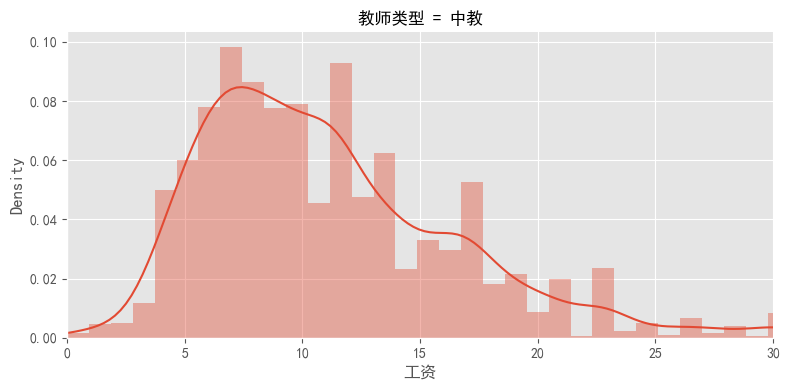

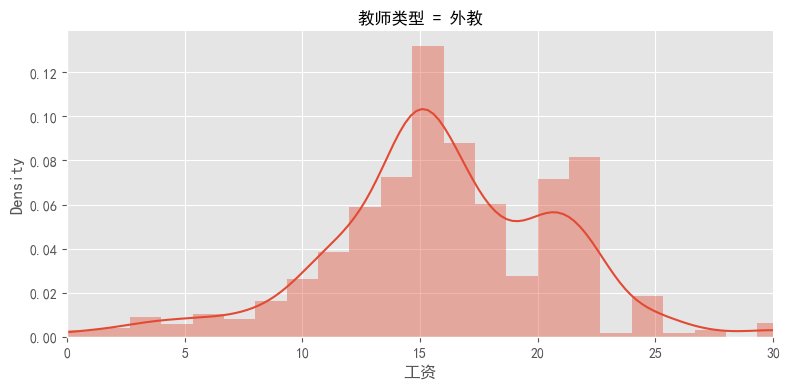

In [35]:
# sns.set(font_scale=1)
# g = sns.FacetGrid(data_salary, row="教师类型", size=4, aspect=5, xlim=(0,30))
print(data_salary)
data_a=data_salary[data_salary['教师类型'].isin(['中教'])]
print(data_a)
data_b=data_salary[data_salary['教师类型'].isin(['外教'])]
print(data_b)
# for index in range(0,len(data_salary)):
#     print(data_salary.iloc[index])
a = sns.FacetGrid(data_a, row="教师类型", height=4, aspect=2,xlim=(0,30))
a.map(sns.distplot, "工资",rug=False)
b = sns.FacetGrid(data_b, row="教师类型", height=4, aspect=2,xlim=(0,30))
b.map(sns.distplot, "工资",rug=False)



In [137]:
np.round(data_jlc['salary_clean'].mean(), 1)

16.1

In [138]:
np.round(data_wx['salary_clean'].mean(), 1)

11.4

In [139]:
data_wx.groupby('city')['salary_clean'].mean().mean()

9.606142445390672

In [140]:
np.round(data_wx.groupby('city')['salary_clean'].mean().sort_values()[:10], 1)
# np.round(data_wx.groupby('city')['salary_clean'].mean().sort_values()[10:], 1)

city
个旧市    2.3
蒙自市    2.3
揭西县    2.5
登封市    2.7
二道区    2.7
路南区    3.0
玉州区    3.2
保定     3.2
长春     3.2
冠县     3.4
Name: salary_clean, dtype: float64

In [141]:
# 通过经验进行对比
data_jlc.loc[data_jlc['exp_title_clean']=='Associate', 'exp_title_clean'] = 'Entry Level'

In [142]:
np.round(data_jlc.groupby('exp_title_clean')['salary_clean'].mean(), 1)

exp_title_clean
Director            20.9
Entry Level         15.9
Executive           14.0
Internship          10.9
Mid-Senior Level    17.5
Name: salary_clean, dtype: float64

In [143]:
np.round(data_wx.groupby('exp')['salary_clean'].mean(), 1)

exp
一到三年     9.0
三到五年    12.9
五到十年    17.0
十年以上    20.8
经验不限     8.8
Name: salary_clean, dtype: float64

'经验不限',     '一到三年',                '三到五年',    '五到十年',           '十年以上'
'Internship', 'Entry Level'+'Associate', 'Executive', 'Mid-Senior Level', 'Director'

In [37]:
attr = ['经验不限\nInternship', '一到三年\nEntry Level', '三到五年\nExecutive',
        '五到十年\nMid-Senior', '十年以上\nDirector']
value1 = [7.8, 8.0, 11.4, 15.0, 18.3]
value2 = [10.9, 14.0, 15.9, 17.5, 20.9]

bar1 = (
    Bar()
    .add_xaxis(attr)
    .add_yaxis("中教",value1,category_gap="60%")
    
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同工作经验的英语中教与外教工资对比"),
        yaxis_opts=opts.AxisOpts(name="薪资/K"),
        xaxis_opts=opts.AxisOpts(name="经验"))
)

bar2 = (
    Bar()
    .add_xaxis(attr)
    .add_yaxis("外教",value2,category_gap="60%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="", pos_top="48%"),
        legend_opts=opts.LegendOpts(pos_top="48%"),
        yaxis_opts=opts.AxisOpts(name="薪资/K"),
        xaxis_opts=opts.AxisOpts(name="经验")
    )
)

grid = (
    Grid()
    .add(bar1, grid_opts=opts.GridOpts(pos_bottom="60%"))
    .add(bar2, grid_opts=opts.GridOpts(pos_top="60%"))
)
grid.render_notebook()
# attr = ['经验不限\nInternship', '一到三年\nEntry Level', '三到五年\nExecutive',
#         '五到十年\nMid-Senior', '十年以上\nDirector']
# value1 = [10.1, 15.8, 14.0, 15.8, 20.9]
# value2 = [7.8, 8.0, 10.1, 13.6, 21.6]

# bar = Bar("不同工作经验的英语外教与中教工资对比", width = 700,height=500)
# bar.add("外教", attr, value1, xaxis_label_textsize=18, legend_top=30,
#         yaxis_label_textsize=20, is_label_show=True)
# bar.add("中教", attr, value2, xaxis_label_textsize=18, legend_top=30,
#         yaxis_label_textsize=20, is_label_show=True)
# bar

In [145]:
# 通过学历进行对比
np.round(data_jlc.groupby('education')['salary_clean'].mean(),1)

education
Any education    14.1
Associate        14.4
Bachelor         16.7
Master           21.3
Name: salary_clean, dtype: float64

In [146]:
# data_wx.loc[data_wx['degree']=='中专', 'degree'] = '高中'

In [147]:
np.round(data_wx.groupby('degree')['salary_clean'].mean(),1)

degree
博士    19.5
大专     6.7
本科    11.7
硕士    13.0
Name: salary_clean, dtype: float64

In [38]:
attr1 = [ '大专', '本科', '硕士','博士']
attr2 = ['Any education', 'Associate','Bachelor', 'Master']

value1 = [6.0, 10.3, 11.4, 17.1]
value2 = [14.1, 14.4, 16.7, 21.3]

bar1 = (
    Bar()
    .add_xaxis(attr1)
    .add_yaxis("中教",value1,category_gap="60%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同学历的英语中教与外教工资对比"),
        yaxis_opts=opts.AxisOpts(name="薪资/K"),
        xaxis_opts=opts.AxisOpts(name="经验"))
)

bar2 = (
    Bar()
    .add_xaxis(attr2)
    .add_yaxis("外教",value2,category_gap="60%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="", pos_top="48%"),
        legend_opts=opts.LegendOpts(pos_top="48%"),
        yaxis_opts=opts.AxisOpts(name="薪资/K"),
        xaxis_opts=opts.AxisOpts(name="经验")
    )
)

grid = (
    Grid()
    .add(bar1, grid_opts=opts.GridOpts(pos_bottom="60%"))
    .add(bar2, grid_opts=opts.GridOpts(pos_top="60%"))
)
grid.render_notebook()

# bar = Bar("不同学历的英语外教与中教工资对比", width = 700,height=500)
# bar.add("外教", attr, value1, xaxis_label_textsize=15, legend_top=30,
#         yaxis_label_textsize=20, is_label_show=True)
# bar.add("中教", attr, value2, xaxis_label_textsize=15, legend_top=30,
#         yaxis_label_textsize=20, is_label_show=True)
# bar

#### 2. 市场对于洋外教的经验和学历要求如何？

In [40]:
exp_demand = np.round(data_jlc['exp_title_clean'].value_counts()/data_jlc['exp_title_clean'].value_counts().sum()*100, 1)

In [41]:
print(exp_demand)
attr3 = ['入门', '中高级', '管理', '主任', '实习']
# bar1 = (
#     Bar()
#     .add_xaxis(attr3)
#     .add_yaxis("中教",value1,category_gap="60%")
#     .set_global_opts(
#         title_opts=opts.TitleOpts(title="不同经验英语外教需求百分比(%)"),
#         yaxis_opts=opts.AxisOpts(name="薪资/K"),
#         xaxis_opts=opts.AxisOpts(name="经验"))
# )

bar3 = (
    Bar()
    .add_xaxis(attr3)
    .add_yaxis("外教",exp_demand.tolist(),category_gap="60%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同经验英语外教需求百分比(%)"),
#         legend_opts=opts.LegendOpts(pos_top="48%"),
        yaxis_opts=opts.AxisOpts(name="占比"),
        xaxis_opts=opts.AxisOpts(name="经验")
    )
)
bar3.render_notebook()
# grid = (
#     Grid()
#     .add(bar1, grid_opts=opts.GridOpts(pos_bottom="60%"))
#     .add(bar2, grid_opts=opts.GridOpts(pos_top="60%"))
# )
# grid.render_notebook()
# bar = Bar("不同经验英语外教需求百分比(%)", width = 500,height=500)

# bar.add("", ['入门', '中高级', '管理', '主任', '实习'], exp_demand.values,  xaxis_label_textsize=20, 
#         yaxis_label_textsize=20, is_label_show=True)
# bar

Entry Level         41.5
Associate           31.2
Mid-Senior Level    18.2
Executive            6.3
Director             1.6
Internship           1.2
Name: exp_title_clean, dtype: float64


In [42]:
degree_demand = np.round(data_jlc['education'].value_counts()/data_jlc['education'].value_counts().sum()*100, 1)

In [43]:
attr4 = ['本科', '学历不限', '社区大学', '硕士']
bar4 = (
    Bar()
    .add_xaxis(attr4)
    .add_yaxis("外教",degree_demand.tolist(),category_gap="60%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="不同学历英语外教需求百分比(%)"),
#         legend_opts=opts.LegendOpts(pos_top="48%"),
        yaxis_opts=opts.AxisOpts(name="占比"),
        xaxis_opts=opts.AxisOpts(name="经验")
    )
)
bar4.render_notebook()
# bar = Bar("不同学历英语外教需求百分比(%)", width = 500,height=500)

# bar.add("", ['本科', '学历不限', '社区大学', '硕士'], degree_demand.values,  xaxis_label_textsize=18, 
#         yaxis_label_textsize=20, is_label_show=True)
# bar

### 3. 哪些地区对洋外教的需求多？

In [44]:
area_demand = data_jlc['area'].value_counts().nlargest(11).drop('Others')

In [45]:
print(area_demand)
attr5 = ['北京', '上海', '杭州', '深圳', '成都', '重庆', '广州', '武汉', '南京', '青岛']
bar5 = (
    Bar()
    .add_xaxis(attr5)
    .add_yaxis("外教",area_demand.tolist(),category_gap="60%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="对外教需求排名前10的城市"),
#         legend_opts=opts.LegendOpts(pos_top="48%"),
        yaxis_opts=opts.AxisOpts(name="占比"),
        xaxis_opts=opts.AxisOpts(name="城市")
    )
)
bar5.render_notebook()
# bar = Bar("对外教需求排名前10的城市", width = 600,height=500)

# bar.add("", ['北京', '上海', '杭州', '深圳', '成都', '重庆', '广州', '武汉', '南京', '青岛'], 
#         area_demand.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
#         is_label_show=True, label_color = ['#130f40'])
# bar

Beijing      402
Shanghai      91
Hangzhou      89
Shenzhen      55
Chengdu       22
Chongqing     21
Wuhan         19
Guangzhou     19
Nanjing       15
Qingdao       11
Name: area, dtype: int64


In [46]:
salary_area = np.round(data_jlc.groupby('area')['salary_clean'].mean()[area_demand.index], 1)

In [47]:
salary_area

Beijing      17.3
Shanghai     16.6
Hangzhou     15.6
Shenzhen     17.5
Chengdu      15.6
Chongqing    11.7
Wuhan        15.2
Guangzhou    15.4
Nanjing      10.8
Qingdao      17.0
Name: salary_clean, dtype: float64

In [48]:
# 中教对应城市的平均薪酬
city10 = ['北京', '上海', '杭州', '深圳', '成都', '重庆', '广州', '武汉', '南京', '青岛']
np.round(data_wx[data_wx['city'].isin(city10)].groupby('city')['salary_clean'].mean(), 1)
# np.round(data_wx[data_wx['province'].isin(city10)].groupby('city')['salary_clean'].mean(), 1)

city
上海    12.7
北京    11.5
广州     8.8
成都     4.5
杭州    12.5
深圳     7.2
重庆     9.0
青岛     6.6
Name: salary_clean, dtype: float64

In [49]:
np.round(data_wx[data_wx['province'].isin(city10)].groupby('province')['salary_clean'].mean(), 1)

province
上海    12.7
北京    11.5
南京    13.0
广州    13.0
成都    13.4
杭州    14.8
武汉    10.5
深圳    11.8
重庆     9.0
青岛     8.3
Name: salary_clean, dtype: float64

In [75]:
bar6 = (
    Bar()
    .add_xaxis(city10)
    .add_yaxis("中教",[11.5,12.7,13.7,9.5,9.0,9.0,10.9,10.5,13.0,7.5],category_gap="60%")
    .add_yaxis("外教",salary_area.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="对外教需求排名前10的城市的外中教平均工资",pos_right="58%"),
        yaxis_opts=opts.AxisOpts(name="薪资/K"),
        xaxis_opts=opts.AxisOpts(name="城市"))
)

bar6.render_notebook()
# bar = Bar("对外教需求排名前10的城市的外教和中教平均工资", width = 800,height=500)

# bar.add("外教", city10, salary_area.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
#         is_label_show=True, legend_top=30)
# bar.add("中教", city10, [9.8, 9.3, 8.9, 8.6, 8.9, 8.0, 8.0, 6.9, 8.0, 7.8],  
#         xaxis_label_textsize=18, yaxis_label_textsize=20, is_label_show=True, legend_top=30)
# bar

#### 4. 什么机构在招聘洋外教？

In [76]:
com_type_demand = data_jlc['com_type'].value_counts().nlargest(5)

In [77]:
com_type_demand

Teaching Center            529
School                     280
Consultancy/Legal/Admin     43
Others                      38
Outsourcing                 12
Name: com_type, dtype: int64

In [78]:
bar6 = (
    Bar()
    .add_xaxis(['培训机构', '学校', '咨询机构', '其它', '外包机构'])
    .add_yaxis("外教",com_type_demand.tolist(),category_gap="60%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="对外教需求排名前5的单位类型"),
#         legend_opts=opts.LegendOpts(pos_top="48%"),
        yaxis_opts=opts.AxisOpts(name="数量"),
        xaxis_opts=opts.AxisOpts(name="单位类型")
    )
)
bar6.render_notebook()
# bar = Bar("对外教需求排名前5的单位类型", width = 600,height=500)

# bar.add("", ['培训机构', '学校', '咨询机构', '其它', '外包机构'], 
#         com_type_demand.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
#         is_label_show=True, label_color = ['#130f40'])
# bar

In [79]:
np.round(data_jlc.loc[data_jlc['com_type'] =='Teaching Center', 'education'].value_counts()/562*100, 1)

Bachelor         65.1
Any education    26.9
Associate         1.6
Master            0.5
Name: education, dtype: float64

In [80]:
salary_com_type = np.round(data_jlc.groupby('com_type')['salary_clean'].mean()[com_type_demand.index], 1)

In [81]:
salary_com_type

Teaching Center            15.0
School                     18.2
Consultancy/Legal/Admin    17.0
Others                     16.8
Outsourcing                15.0
Name: salary_clean, dtype: float64

In [82]:
print(type(salary_com_type))
bar7 = (
    Bar()
    .add_xaxis(['培训机构', '学校', '咨询机构', '其它', '外包机构'])
    .add_yaxis("外教",salary_com_type.tolist(),category_gap="60%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="对外教需求排名前5的单位类型的外教平均工资"),
#         legend_opts=opts.LegendOpts(pos_top="48%"),
        yaxis_opts=opts.AxisOpts(name="工资/K"),
        xaxis_opts=opts.AxisOpts(name="单位类型")
    )
)
bar7.render_notebook()
# bar = Bar("对外教需求排名前5的单位类型的外教平均工资", width = 600,height=500)

# bar.add("", ['培训机构', '学校', '咨询机构', '其它', '外包机构'], 
#         salary_com_type.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
#         is_label_show=True, label_color = ['#130f40'])
# bar

<class 'pandas.core.series.Series'>


In [83]:
data_jlc[data_jlc['com_type']=='Teaching Center'].groupby('education')['com_type'].count()/562

education
Any education    0.268683
Associate        0.016014
Bachelor         0.651246
Master           0.005338
Name: com_type, dtype: float64

In [84]:
company = data_jlc['company'].value_counts().nlargest(50)

In [85]:
# print(company)
print(type(company))
company2 = pd.DataFrame({'机构名称':company.index,'数量':company.values})
print(company2.values)


c = (
    WordCloud()
    .add("", company2.values, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="招收外教单位词云图"))
) 
c.render_notebook()
# wordcloud = WordCloud(width=1000, height=600)
# wordcloud.add("", company.index, company.values, word_size_range=[20, 100])
# wordcloud

<class 'pandas.core.series.Series'>
[['LCAIS' 99]
 ['Wilshire Global Consulting' 89]
 ['Hailiang ECE' 57]
 ['Geosita Educational Technology Limited Coo' 32]
 ['51talk' 31]
 ['Sara' 25]
 ['ESL JOB IN CHINA' 24]
 ['JingJobs' 20]
 ['T-school' 16]
 ['TALENT WAY' 15]
 ['Meten' 15]
 ['Elantu' 14]
 ['DaDaABC' 13]
 ['New Pathway' 11]
 ['I2 国际私塾' 10]
 ['V-Ron International English' 10]
 ['Cecilia' 9]
 ['Relevant' 9]
 ['51Laoy' 9]
 ['Wuhan Golden Apple Tree Education Consultation Co.' 8]
 ['Sendelta Education' 7]
 ['boxfish-edu' 7]
 ['Beijing Prepare' 6]
 ['Spirit Kids Royal English' 6]
 ['WEBi ENGLISH ' 6]
 ['Linko' 6]
 ['K12 Education' 5]
 ['Expert International Education' 5]
 ['Imagine Education Group' 5]
 ['Yungu School' 5]
 ['PalFish Education' 5]
 ['ABIE' 5]
 ['Tianshuo Education' 5]
 ['Field Education' 5]
 ['美国私塾' 5]
 ['HeNan Liyun' 4]
 ['KB Financial' 4]
 ['The Intelligent and Creative Sailor Company' 4]
 ['Prestige' 4]
 ['Phinnie Education Group' 4]
 ['Infotop' 4]
 ['BabyCandy' 4]
 ['EF

### 5. 洋外教来源真的很乱吗？

In [86]:
data_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NickName   498 non-null    object
 1   City       282 non-null    object
 2   Province   358 non-null    object
 3   Sex        498 non-null    int64 
 4   Signature  273 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.6+ KB


In [87]:
data_gm.sample(5)

,NickName,City,Province,Sex,Signature
20,博知教育 Anna Wang,河东,天津,2,物随心转，境由心造。
284,Ihor,河西,天津,1,The best is yet to come
237,Steven -the king of the world,New York,New York,1,God made human everyone is equal
66,༄ེིོུཉ྄ིོུNRM༄,西青,天津,1,NaN
394,🌸 Flora🌸,NaN,NaN,0,NaN


In [88]:
sex = data_gm['Sex'].value_counts()

In [89]:
print(type(sex))
sex2 = pd.DataFrame({'性别':sex.index,'数量':sex.values})
print(sex2.values)
p = (
    Pie()
    .add("", [list(z) for z in zip(['男性', '女性', '未知'], sex2['数量'])])
    .set_global_opts(title_opts=opts.TitleOpts(title="性别比例"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    
)
p.render_notebook()
# pie =Pie('性别比例',background_color = 'white', width=500, height=500)
# pie.add('',['男性', '女性', '未知'],sex.values, 
#         center = [50,50],radius=[25, 50],rosetype='radius', is_label_show=True,
#        legend_text_size=16, label_text_size=16)
# pie

<class 'pandas.core.series.Series'>
[[  1 262]
 [  2 191]
 [  0  45]]


In [90]:
data_gm['Province2'] = data_gm['Province'].str.extract(r"([a-z|A-Z]*\s?[a-z|A-Z]*)")

In [91]:
province = data_gm['Province2'].value_counts().drop('')

In [92]:
province

Paris                4
Ontario              4
England              3
New York             3
Florida              3
California           3
Johannesburg         3
Istanbul             2
Auckland             2
Dubai                2
Chelyabinsk          1
Leeuwarden           1
Cape Town            1
Western Australia    1
British Columbia     1
Lyon                 1
Virginia             1
Buenos Aires         1
Madrid               1
Sumatera Utara       1
Milano               1
Hyderabad            1
La Coruna            1
Illinois             1
Amsterdam            1
Kazan                1
Texas                1
Hamburg              1
Arizona              1
Osaka                1
Cologne              1
Frankfurt            1
Quebec               1
Wales                1
Clare                1
Venice               1
Abbotsford           1
North Carolina       1
Christchurch         1
Scotland             1
Bangkok              1
Waterford            1
Toronto              1
Aragua     

In [93]:
province2 = pd.DataFrame({'城市':province.index,'数量':province.values})
w = (
    WordCloud()
    .add("", province2.values, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="招收外教单位词云图"))
) 
w.render_notebook()